 Data loaded successfully!

 Model Accuracy: 98.07%

 Predictions for all players saved to 'predicted_players_21.csv' successfully!

 Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.90      0.91      0.91       386

    accuracy                           0.98      3789
   macro avg       0.95      0.95      0.95      3789
weighted avg       0.98      0.98      0.98      3789



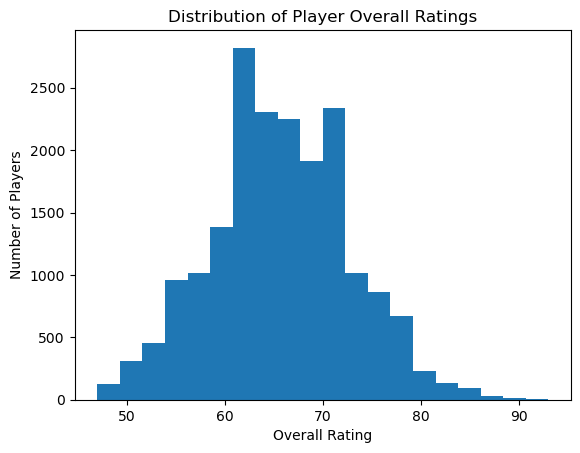

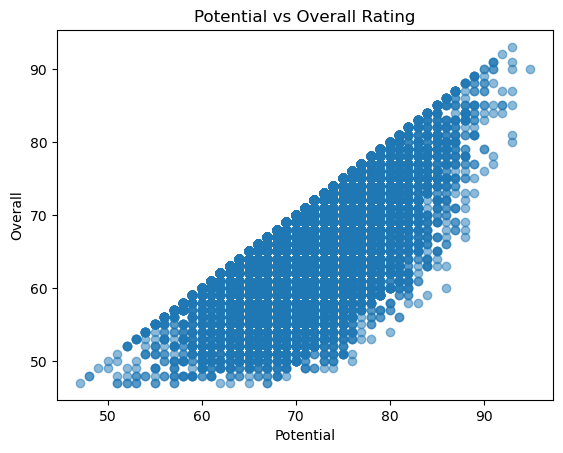

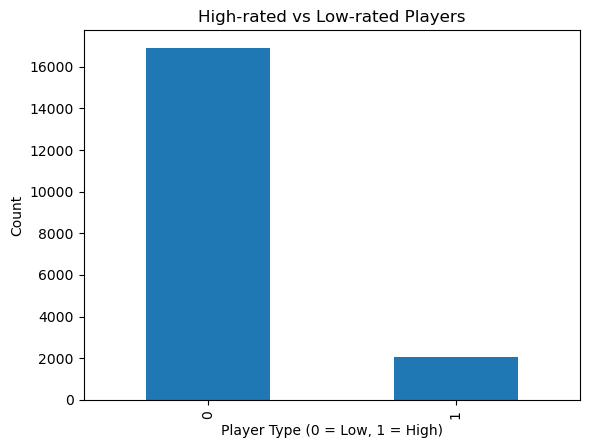

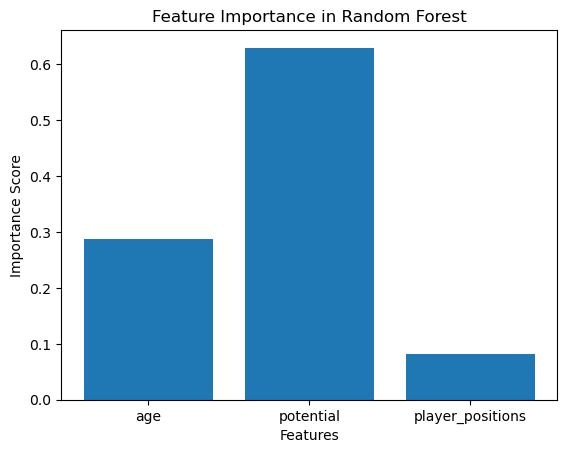

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = pd.read_csv("players_21.csv")
print(" Data loaded successfully!\n")

# Step 2: Select only useful columns and remove missing data
data = data[['age', 'potential', 'player_positions', 'overall']].dropna()

# Step 3: Encode player positions
le = LabelEncoder()
data['player_positions'] = le.fit_transform(data['player_positions'])

# Step 4: Create target column (1 = High-rated if overall ≥ 75, else 0)
data['high_rated'] = (data['overall'] >= 75).astype(int)

# Step 5: Define input features (X) and target (y)
X = data[['age', 'potential', 'player_positions']]
y = data['high_rated']

# Step 6: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 8: Evaluate model performance
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy: {accuracy * 100:.2f}%\n")

# Step 9: Predict for ALL players in the dataset
data['predicted_high_rated'] = model.predict(X)

# Step 10: Save results to a new CSV
output_file = "predicted_players_21.csv"
data.to_csv(output_file, index=False)
print(f" Predictions for all players saved to '{output_file}' successfully!\n")

# Step 11: Classification report
print(" Classification Report:\n")
print(classification_report(y_test, predictions))



#Distribution of overall ratings
plt.figure()
plt.hist(data['overall'], bins=20)
plt.title("Distribution of Player Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Number of Players")
plt.show()

#Relationship between Potential and Overall
plt.figure()
plt.scatter(data['potential'], data['overall'], alpha=0.5)
plt.title("Potential vs Overall Rating")
plt.xlabel("Potential")
plt.ylabel("Overall")
plt.show()

#Count of High-rated vs Low-rated Players
plt.figure()
data['high_rated'].value_counts().plot(kind='bar')
plt.title("High-rated vs Low-rated Players")
plt.xlabel("Player Type (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.show()

#Feature Importance from Random Forest
plt.figure()
importances = model.feature_importances_
features = X.columns
plt.bar(features, importances)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()